# Step: 1 Pre-Processing

#1.1.Import all required libraies

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns  

#1.2.Load dataset file into google colab repository

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Walmart.csv to Walmart.csv


In [40]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Walmart.csv']))
print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1    5/2/2010    1643690.90             0        42.31       2.572   
1         1   12/2/2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1    5/3/2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45   5/10/2012     733455.07             0        64.89       3.985   
6432     45  12/10/2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

 # Step 2 : Data Exploration

In [41]:
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


#Step2.1.Verify dataset rows [6435] and colums [8] count

In [42]:
df.shape

(6435, 8)

#Step.2.2.View all the columns in the dataset

In [43]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [44]:
df.describe().T.style.background_gradient(subset=['25%','75%'], cmap='Greys')

,count,mean,std,min,25%,50%,75%,max
Store,6435.000000,23.000000,12.988182,1.000000,12.000000,23.000000,34.000000,45.000000
Weekly_Sales,6435.000000,1046964.877562,564366.622054,209986.250000,553350.105000,960746.040000,1420158.660000,3818686.450000
Holiday_Flag,6435.000000,0.069930,0.255049,0.000000,0.000000,0.000000,0.000000,1.000000
Temperature,6435.000000,60.663782,18.444933,-2.060000,47.460000,62.670000,74.940000,100.140000
Fuel_Price,6435.000000,3.358607,0.459020,2.472000,2.933000,3.445000,3.735000,4.468000
CPI,6435.000000,171.578394,39.356712,126.064000,131.735000,182.616521,212.743293,227.232807
Unemployment,6435.000000,7.999151,1.875885,3.879000,6.891000,7.874000,8.622000,14.313000


In [45]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Inference : Intrestingly , there are NO null values in the given dataset** ☹

#Step:2.4.Checking number of unique rows in each feature

In [46]:
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

#Step:2.5.Split the data into features and target variable & date column into day,month,year for better data analysis

In [47]:
# Reframing the columns

df.Date=pd.to_datetime(df.Date)

#df['weekday'] = df.Date.dt.weekday
#df['month'] = df.Date.dt.month
#df['year'] = df.Date.dt.year

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = (df.Date.dt.year).astype(int)
df['Month'] = (df.Date.dt.month).astype(int)
df['Week'] = ((df.Date.dt.isocalendar().week)*1.0).astype(int)
df['Day'] = (df.Date.dt.day).astype(int)


target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18,3


#Step:2.6.Checking types of data in each feature

In [48]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; 
for i in range(df[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf))) 


Inference: The Datset has 6 numerical & 5 categorical features.


#Step.2.7.Inference: The Datset has 5 numerical & 5 categorical features.

# Step :3 Exploratory Data Analysis (EDA)

#Step.3.1.Let us first analyze the distribution of the target variable (Weekly_sales)

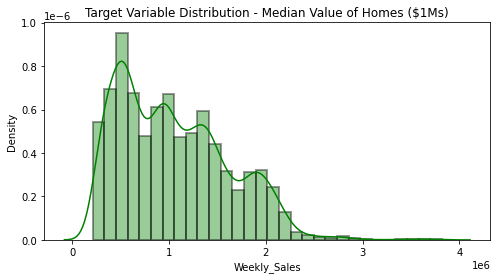

In [49]:
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

#Step.3.2.Inference:The Target Variable (weekly Sales) seems to be be normally distributed, averaging around 20 units.

#Step.3.3.Let's look at sales anlaysis 

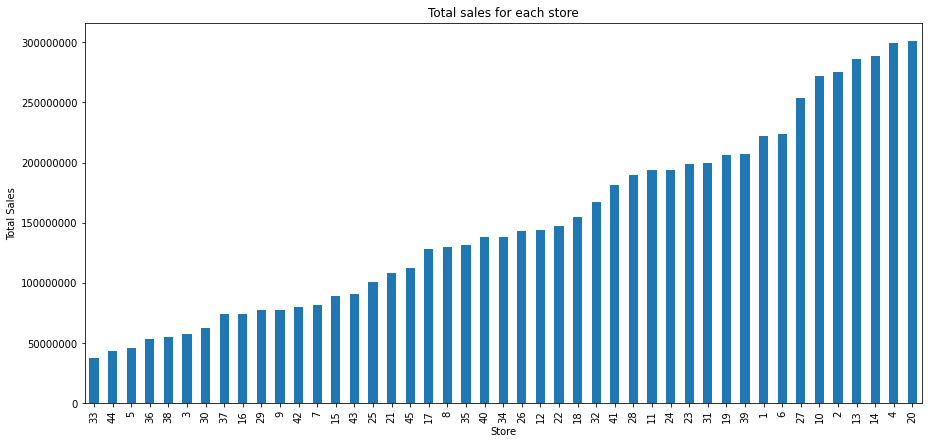

In [50]:
total_sales= df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_array = np.array(total_sales)
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')

##Step.3.4.Interference : a. Store-20 has maximum sales b. Store-33 has minmum sales

In [54]:
walmart_data_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
walmart_data_std.head(1).index[0] , walmart_data_std.head(1).Weekly_Sales[walmart_data_std.head(1).index[0]]

(14, 317569.9494755081)

#Step.3.5.Inference : Store-14 has maximum standard deviation , thus it has sales more sales variation... let's look at the data distribution for store-14

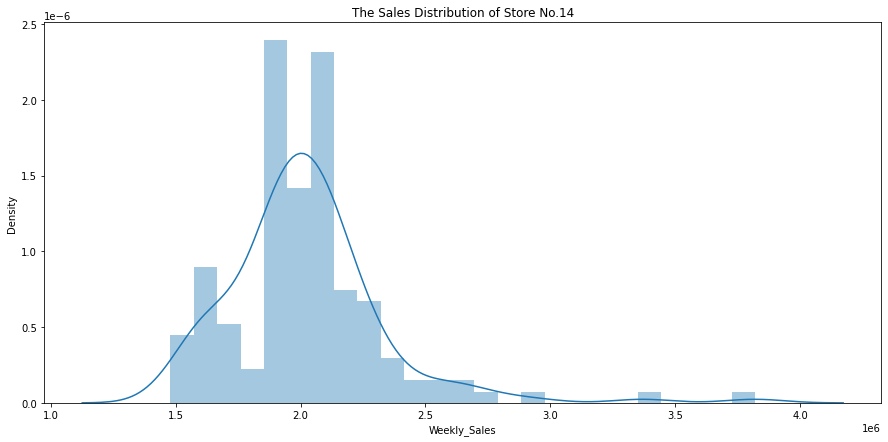

In [58]:
plt.figure(figsize=(15,7))
sns.distplot(df[df['Store'] == walmart_data_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store No.'+ str(walmart_data_std.head(1).index[0]))
import warnings
warnings.filterwarnings('ignore')

#Calculating the coefficient of mean to standard deviation

In [56]:
coef = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())
coef = coef.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_max = coef.sort_values(by='Coefficient of mean to standard deviation',ascending=False)
coef_max.head(7)

,Coefficient of mean to standard deviation
Store,
35,0.229681
7,0.197305
15,0.193384
29,0.183742
23,0.179721
21,0.170292
45,0.165613


##Step.3.6.Inference : Store-35 has more maximum coefficient of mean to standard deviation

# Let look at the data distribution

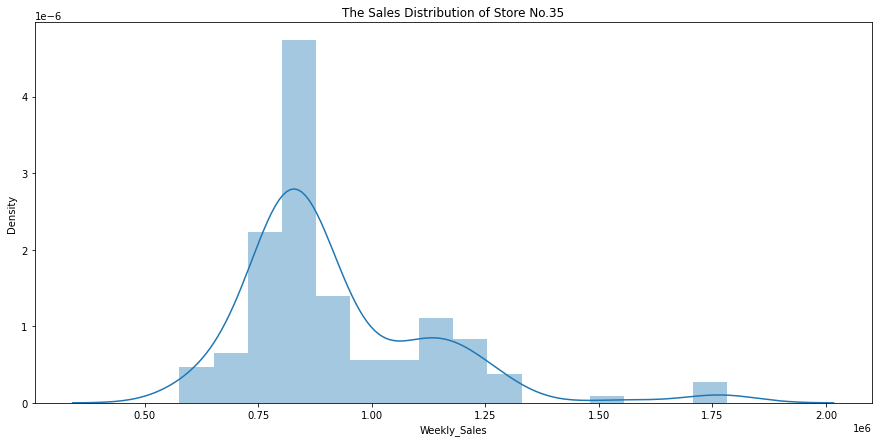

In [57]:
plt.figure(figsize=(15,7))
sns.distplot(df[df['Store'] == coef_max.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store No.'+str(coef_max.head(1).index[0]))
import warnings
warnings.filterwarnings('ignore')

#Step.3.7.Inference - Store-35 has  maximum coefficient of mean to standard deviation , hence sales variation in that store is more compared to other stores

In [18]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18,3


#Step.3.8.Let's look at Sales for second and third quarter in 2012

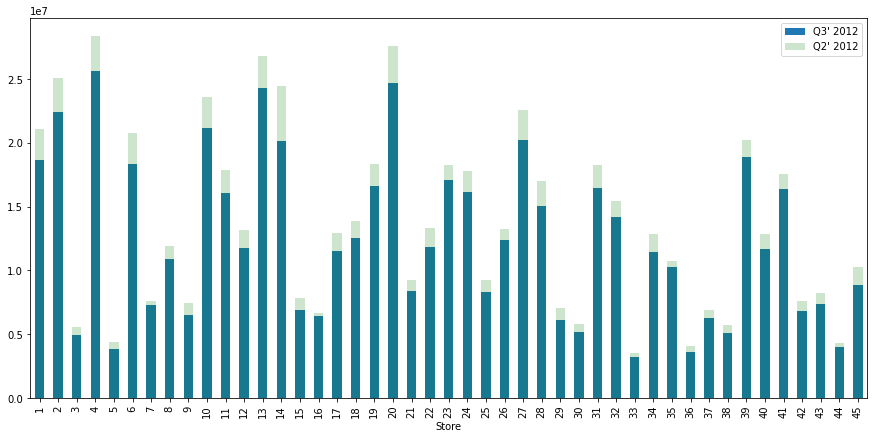

In [19]:
quarter_2_sales = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
quarter_3_sales= df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

plt.figure(figsize=(15,7))
quarter_2_sales.plot(ax=quarter_3_sales.plot(kind ='bar'),kind='bar',color='g',alpha=0.2,legend=True)
plt.legend(["Q3' 2012", "Q2' 2012"])

#Step.3.9.Inference : from the above data Visualizations , store 4 has maximum sales in Q3'2012

#Step.3.10.Let's look at the Holidays impact on Sales

In [20]:
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

Super_Bowl_Sales = (pd.DataFrame(df.loc[df.Date.isin(Super_Bowl)]))['Weekly_Sales'].mean()
Labour_Day_Sales = (pd.DataFrame(df.loc[df.Date.isin(Labour_Day)]))['Weekly_Sales'].mean()
Thanksgiving_Sales = (pd.DataFrame(df.loc[df.Date.isin(Thanksgiving)]))['Weekly_Sales'].mean()
Christmas_Sales = (pd.DataFrame(df.loc[df.Date.isin(Christmas)]))['Weekly_Sales'].mean()
Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales

(1079127.9877037038, 1042427.293925926, 1471273.427777778, 960833.1115555555)

#Step.3.11.Calculating mean sales on non-holidays :


In [21]:
Non_Holiday_Sales = df[df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()
Non_Holiday_Sales

1041256.3802088555

In [22]:
Mean_Sales = {'Super_Bowl_Sales' : Super_Bowl_Sales,
              'Labour_Day_Sales': Labour_Day_Sales,
              'Thanksgiving_Sales':Thanksgiving_Sales,
              'Christmas_Sales': Christmas_Sales,
              'Non_Holiday_Sales': Non_Holiday_Sales}
Mean_Sales 

{'Super_Bowl_Sales': 1079127.9877037038,
 'Labour_Day_Sales': 1042427.293925926,
 'Thanksgiving_Sales': 1471273.427777778,
 'Christmas_Sales': 960833.1115555555,
 'Non_Holiday_Sales': 1041256.3802088555}

#Step.3.12.Inference : From above 2 data analysis  , seems like sales was Higher in thanks giving day compared to other Holidays

#Step.3.13.Ok , let's look Montly & Yearly sales

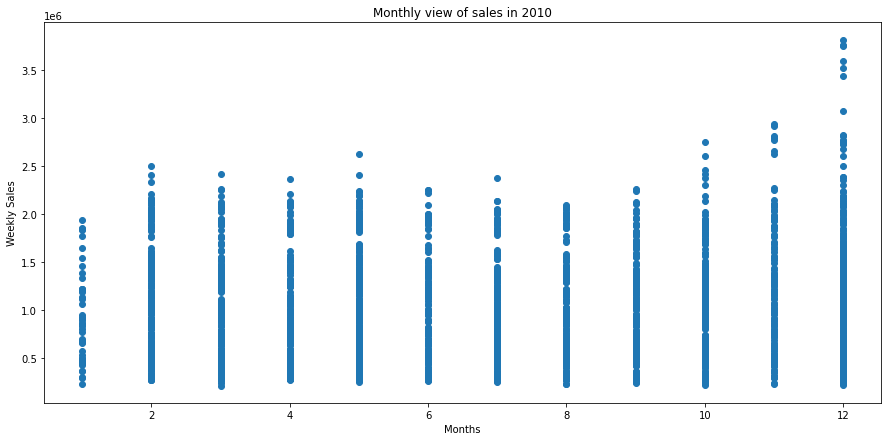

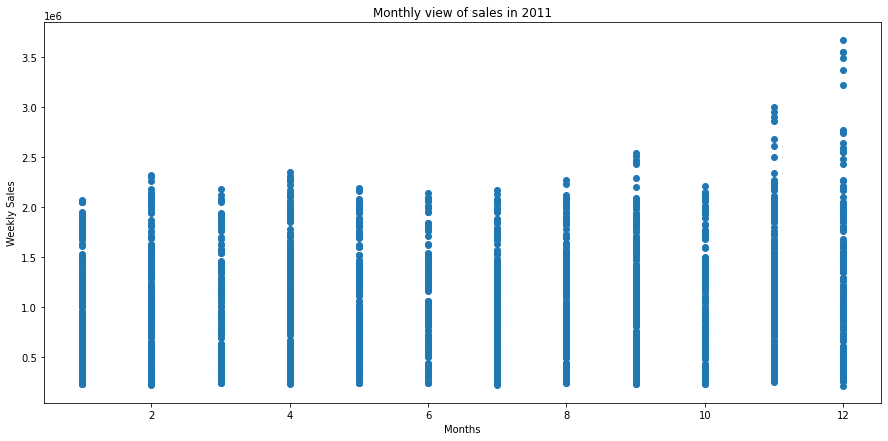

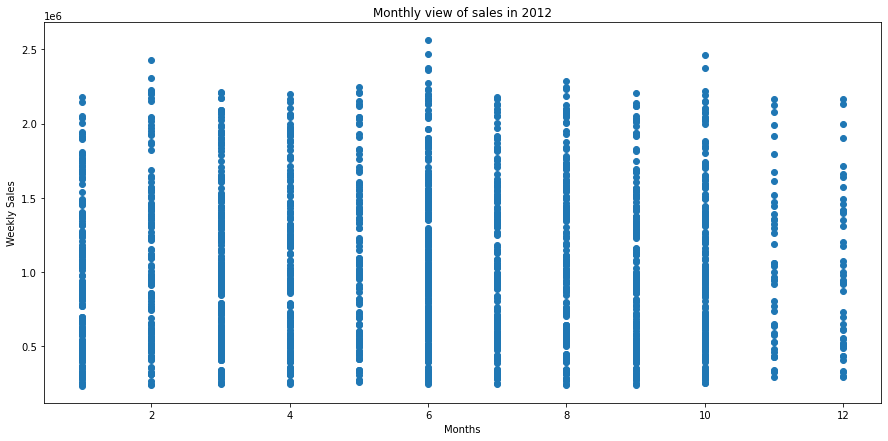

In [59]:

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2010]["Month"],df[df.Year==2010]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2011]["Month"],df[df.Year==2011]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2012]["Month"],df[df.Year==2012]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

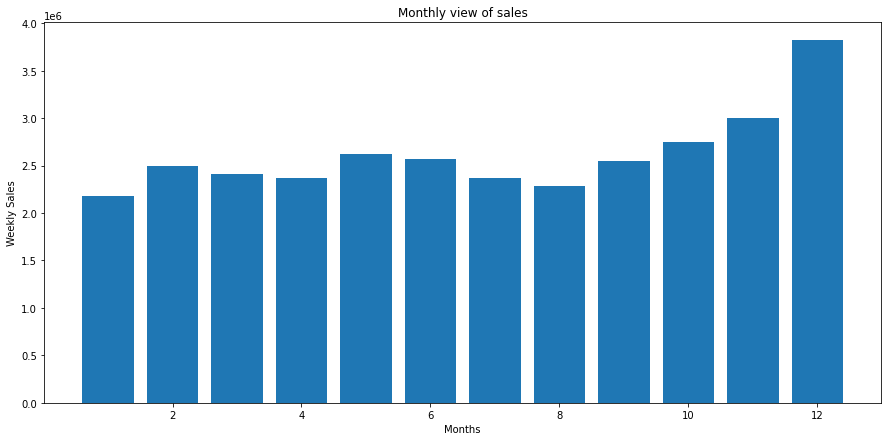

<Figure size 1080x504 with 0 Axes>

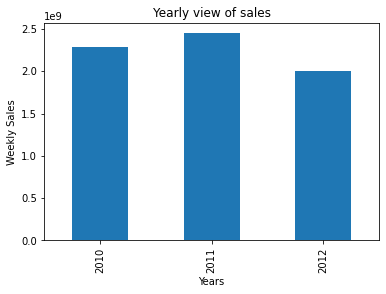

In [24]:
plt.figure(figsize=(15,7))
plt.bar(df["Month"],df["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.show()

plt.figure(figsize=(15,7))
df.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("Years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales")
plt.show()

#Step.3.14.Inference : overall monthly sales are higher in the month of December while the yearly sales in the year 2011 are the highest.

#Step:4.Let's build and asses the appropriate model for the given propblem
[Traget Variable : weekly_sales and dependent varibales (CPI,unemployment , fuel price and temperature)]

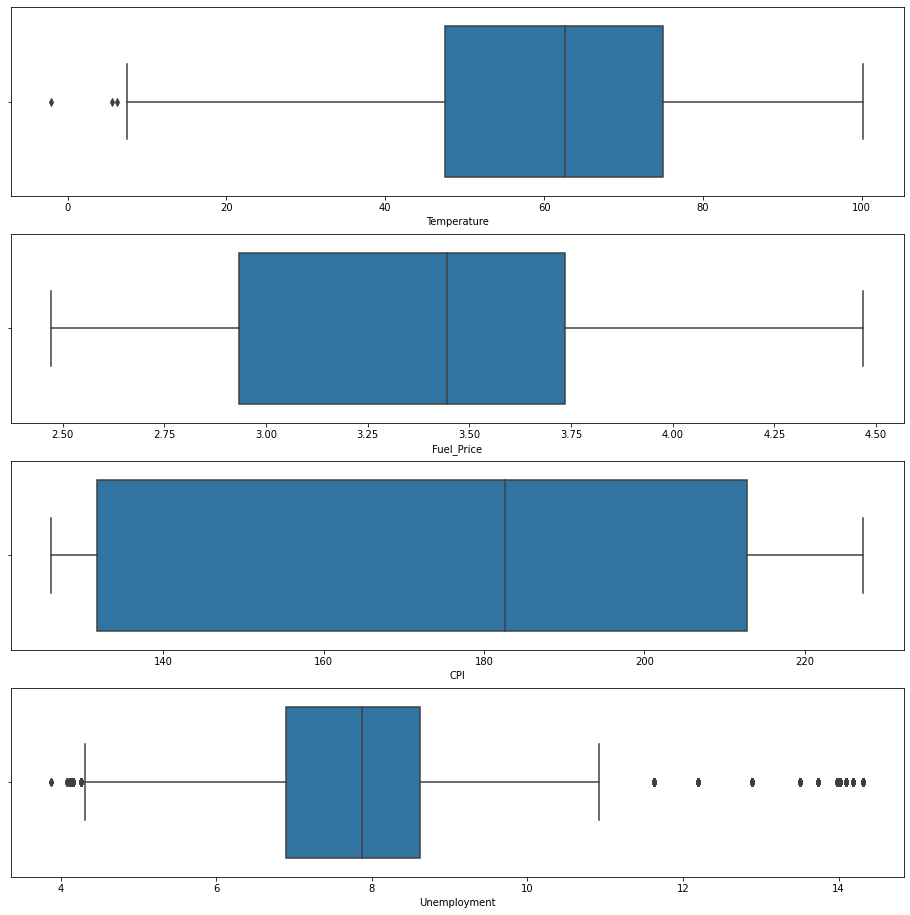

In [25]:
fig, axis = plt.subplots(4,figsize=(16,16))
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df[column],ax=axis[i])
    
import warnings
warnings.filterwarnings('ignore')

#Step :4.1.Remove the outlier from the above graph(s)

In [26]:
walmart_data_clean = df[(df['Unemployment']<10) & (df['Unemployment']>4.5) & (df['Temperature']>10)]
walmart_data_clean

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,19,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,50,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,19


#Step:4.2. Checking for outliers

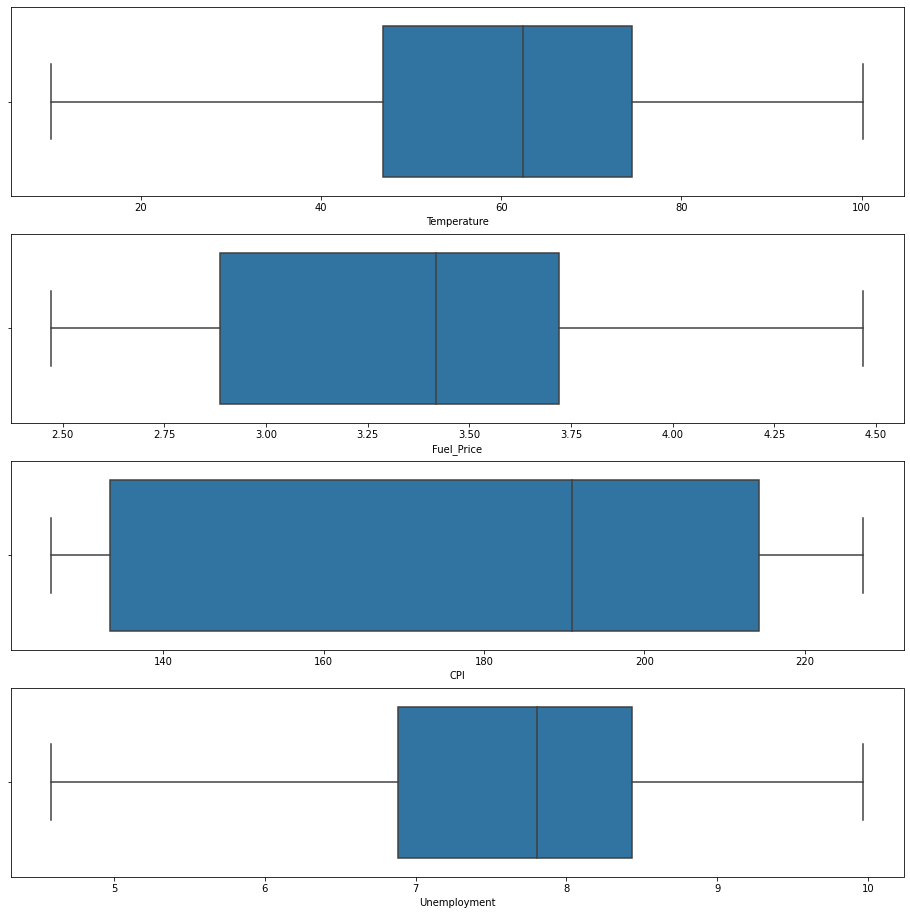

In [27]:
fig, axis = plt.subplots(4,figsize=(16,16))
X = walmart_data_clean[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(walmart_data_clean[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')

#Step:4.3.Lt's build Linear Regession Model

In [99]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
#X = walmart_data_clean[['Store','Fuel_Price','CPI','Unemployment','weekday','Month','Year','Day','Week']]
#X = walmart_data_clean[['Store','Fuel_Price','CPI','Unemployment','Month','Year','Day','Week']]
X = walmart_data_clean[['Store','Unemployment','Month','Year','Day','Week']]
Y = walmart_data_clean['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

Linear Regression:
-------------------
-------------------
Accuracy: 10.735807625592331
Mean Absolute Error: 457112.2993460753
Mean Squared Error: 310621991905.2141
Root Mean Squared Error: 557334.7216038259


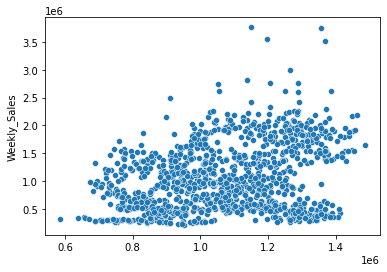

In [100]:
print('Linear Regression:')
print('-------------------')
print('-------------------')
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)

import warnings
warnings.filterwarnings('ignore')

#Step:4.4.Let's build Linear Random Forest Model

Random Forest Regressor:
-------------------
-------------------
Accuracy: 94.75177159495907
Mean Absolute Error: 69686.83603807422
Mean Squared Error: 18059886499.82098
Root Mean Squared Error: 134387.0771310284


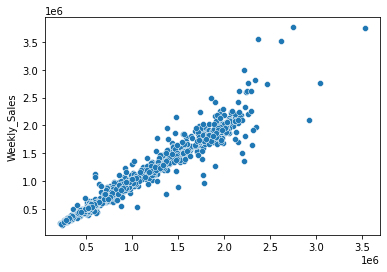

In [101]:
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print('-------------------')
print('-------------------')
rfr = RandomForestRegressor()        
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)


import warnings
warnings.filterwarnings('ignore')

#Step:4.5.Inference - Linear Regression is not an appropriate model to use which is clear from it's low accuracy. However, Random Forest Regression gives accuracy of over 95 % , so, it is the best model to forecast 

#So now we will try to improve it's accuracy further by tuning it's parameters

#Step:5 Hyperparameter tuning on Random Forest Model

In [102]:
n_estimators = [5,20,50,100] 
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] 
min_samples_split = [2, 6, 10] 
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}
rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [103]:
print ('Random grid: ', random_grid, '\n')
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 120, 'bootstrap': True}  



In [104]:
#randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 120, bootstrap=True) 
randmf = RandomForestRegressor(n_estimators = 200, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 500, bootstrap=True) 
randmf.fit( X_train, Y_train) 
x_pred = randmf.predict(X_train)
y_pred = randmf.predict(X_test)

For Training Data 
 --------------------------------
MAE:  24513.504256871387
MSE:  2110551046.0531163
r2:  0.9935976215072292
RMSE:  45940.73406088671

For Test Data 
 --------------------------------
MAE:  69896.53582720843
MSE:  18174934258.24968
r2:  0.9471833855462807
RMSE:  134814.44380425147
Residual Analysis:


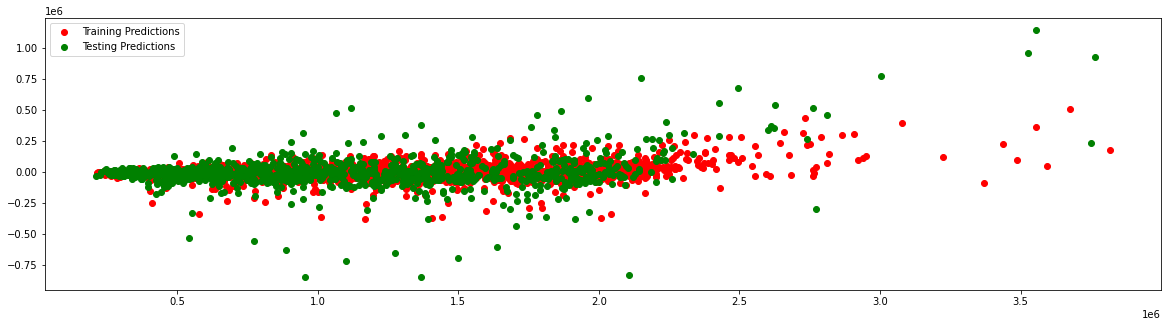

In [105]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from termcolor import cprint

print("For Training Data \n --------------------------------")
print("MAE: ",mean_absolute_error(Y_train, x_pred))
print("MSE: ",mean_squared_error(Y_train, x_pred))
print("r2: ",r2_score(Y_train, x_pred))
print("RMSE: ",np.sqrt(mean_squared_error(Y_train, x_pred)))

print("")
print("For Test Data \n --------------------------------")
print("MAE: ",mean_absolute_error(Y_test, y_pred))
print("MSE: ",mean_squared_error(Y_test, y_pred))
print("r2: ",r2_score(Y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(Y_test,y_pred)))
    
print("Residual Analysis:")
plt.figure(figsize = (20,5))
plt.scatter(Y_train,(Y_train-x_pred),color = "red",label = 'Training Predictions')
plt.scatter(Y_test,(Y_test-y_pred),color = "green",label = 'Testing Predictions')
plt.legend()
plt.show()

# Step 5.1 So, our accuracy has improved slightly after hyperparameter tuning from 95 to 99 Hence, we will take this as our final model for further prediction

# Step:6 : Let's Looks at Forecasting Sales for each Store For Next 12 Weeks

In [120]:
forcast_data = walmart_data_clean.copy()
#forcast_data['Date']=pd.to_datetime(forcast_data['Date'])

# Step : 6.1.Pre-processing work to create a forecasting 

In [121]:
#Create formate For Next 12 Weeks
futuredate=[]
futurestore=[]
futureemplo=[]
futureweek=[]
for i in range(1,46):
    st=forcast_data[forcast_data['Store']==i]
    for m in range (1,13):
        d1=st['Date'].max()+timedelta(weeks=m)
        futuredate.append(d1)
        futurestore.append(i)
        futureweek.append(st['Week'].mean())
        futureemplo.append(st['Unemployment'].mean())

In [122]:
# Create a temporary dataframe 
tmpdf=pd.DataFrame()
tmpdf['Date']=futuredate
tmpdf['Store']=futurestore
tmpdf['Unemployment']=futureemplo
tmpdf['Week']=futureweek


tmpdf['Year'] = pd.to_datetime(tmpdf['Date']).dt.year
tmpdf['Month'] = pd.to_datetime(tmpdf['Date']).dt.month
tmpdf['Day'] = pd.to_datetime(tmpdf['Date']).dt.day
tmpdf.drop(columns=['Date'])
forecastdf=tmpdf.copy()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [123]:
#forecastdf.isnull().sum()
forecastdf = forecastdf.drop('Date', axis=1)
forecastdf = forecastdf.dropna()
forecastdf.isnull().sum()

Store           0
Unemployment    0
Week            0
Year            0
Month           0
Day             0
dtype: int64

# Step : 6.2. Let's predict a Next 12 weeks forecast Data Pass Throught our Regressor

In [124]:
forecastdf['Predicted_Sales']=rfr.predict(forecastdf)

Step : 6.3. Let's plot the forecating the data to visulize

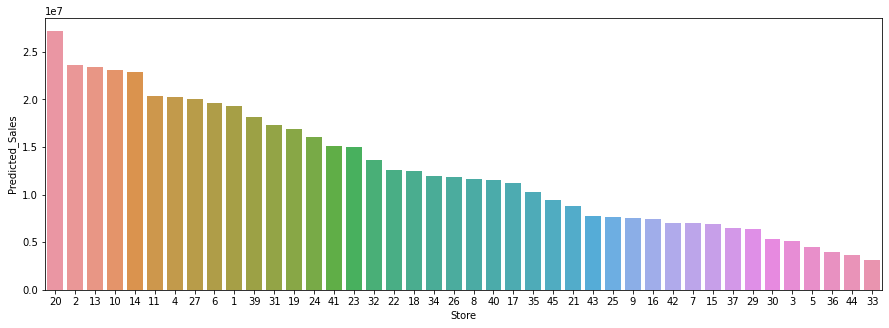

In [126]:
#checking Future Sales Of Stores
nfd=pd.DataFrame(forecastdf.groupby('Store')['Predicted_Sales'].sum().reset_index())
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Predicted_Sales', data=nfd, order=nfd.sort_values(by='Predicted_Sales',ascending=False)['Store'])

# Step:6 Let's look at forcasting (Next 12 weeks) for store-20 as it has max sales from the above forecasting

In [127]:
store20_data = forecastdf[(forecastdf['Store'] ==20)]
#tests_df[(tests_df['grade'] > 10)]
store20_data

,Store,Unemployment,Week,Year,Month,Day,Predicted_Sales
228,20,7.371,26.000,2012.000,12.000,17.000,2407852.805
229,20,7.371,26.000,2012.000,12.000,24.000,2418687.378
230,20,7.371,26.000,2012.000,12.000,31.000,2431180.956
231,20,7.371,26.000,2013.000,1.000,7.000,2194629.256
232,20,7.371,26.000,2013.000,1.000,14.000,2198497.444
233,20,7.371,26.000,2013.000,1.000,21.000,2165567.546
234,20,7.371,26.000,2013.000,1.000,28.000,2110312.447
235,20,7.371,26.000,2013.000,2.000,4.000,2256174.448
236,20,7.371,26.000,2013.000,2.000,11.000,2282185.865
237,20,7.371,26.000,2013.000,2.000,18.000,2281921.578


Text(0.5, 0, 'Weeks')

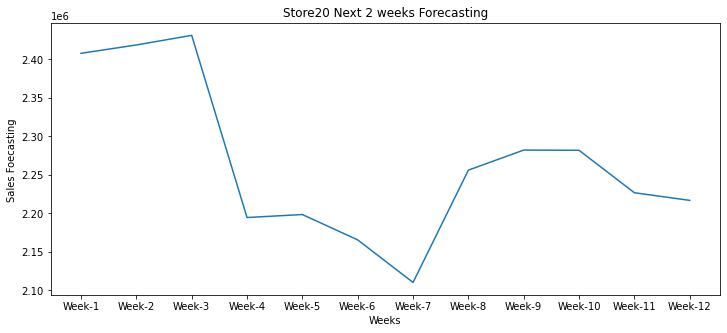

In [140]:
#checking Future Sales Of Stores
plt.figure(figsize=(12,5))
plt.plot(store20_data['weeks_index'], store20_data['Predicted_Sales']) 
plt.title("Store20 Next 2 weeks Forecasting")
plt.ylabel('Sales Foecasting ')
plt.xlabel('Weeks')

## Rough work for understaning 

In [36]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from pandas import DataFrame
import numpy as np
from datetime import datetime
import calendar
from datetime import timedelta
import datetime as dt
def add_month(df, forecast_length, forecast_period):
    end_point = len(df)
    df1 = pd.DataFrame(index=range(forecast_length), columns=range(2))
    df1.columns = ['Weekly_Sales', 'Date']
    df = df.append(df1)
    df = df.reset_index(drop=True)
    x = df.at[end_point - 1, 'Date']
    x = pd.to_datetime(x, format='%Y-%m-%d')
    days_in_month=calendar.monthrange(x.year, x.month)[1]
    if forecast_period == 'Week':
        for i in range(forecast_length):
            df.at[df.index[end_point + i], 'Date'] = x + timedelta(days=7 + 7 * i)
            df.at[df.index[end_point + i], 'Weekly_Sales'] = 0
    elif forecast_period == 'Month':
        for i in range(forecast_length):
            df.at[df.index[end_point + i], 'Date'] = x + timedelta(days=days_in_month + days_in_month * i)
            df.at[df.index[end_point + i], 'Weekly_Sales'] = 0
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df = df.drop(['Date'], axis=1)
    return df

def create_lag(df3):
    dataframe = DataFrame()
    for i in range(12, 0, -1):
        dataframe['t-' + str(i)] = df3.Weekly_Sales.shift(i)
    df4 = pd.concat([df3, dataframe], axis=1)
    df4.dropna(inplace=True)
    return df4


def randomForest(df1, forecast_length, forecast_period):
    df3 = df1[['Weekly_Sales', 'Date']]
    df3 = add_month(df3, forecast_length, forecast_period)
    finaldf = create_lag(df3)
    finaldf = finaldf.reset_index(drop=True)
    n = forecast_length
    end_point = len(finaldf)
    x = end_point - n
    finaldf_train = finaldf.loc[:x - 1, :]
    finaldf_train_x = finaldf_train.loc[:, finaldf_train.columns != 'Weekly_Sales']
    finaldf_train_y = finaldf_train['Weekly_Sales']
    print("Starting model train..")
    #rfe = RFE(RandomForestRegressor(n_estimators=100, random_state=1), 4)
    rfe = RandomForestRegressor(n_estimators=100, random_state=1)
    fit = rfe.fit(finaldf_train_x, finaldf_train_y)
    print("Model train completed..")
    print("Creating forecasted set..")
    salesforcast = []
    end_point = len(finaldf)
    n = forecast_length
    df3_end = len(df3)
    for i in range(n, 0, -1):
        y = end_point - i
        inputfile = finaldf.loc[y:end_point, :]
        inputfile_x = inputfile.loc[:, inputfile.columns != 'Weekly_Sales']
        pred_set = inputfile_x.head(1)
        pred = fit.predict(pred_set)
        df3.at[df3.index[df3_end - i], 'Weekly_Sales'] = pred[0]
        finaldf = create_lag(df3)
        finaldf = finaldf.reset_index(drop=True)
        salesforcast.append(pred)
    salesforcast = np.array(salesforcast)
    print("12 weeks Forecast complete..")
    return salesforcast

    

In [37]:
predicted_value=randomForest(store4_data, 12, 'Week')
predicted_value




Starting model train..
Model train completed..
Creating forecasted set..
12 weeks Forecast complete..


array([[2100174.4615],
       [2146930.5684],
       [2219951.1703],
       [2211055.9536],
       [2238996.519 ],
       [2245796.9393],
       [2258020.7188],
       [2321008.8757],
       [2403576.3375],
       [2381317.8174],
       [2359039.2347],
       [2367809.3265]])

In [38]:
predicted_value.size
i = 0
print('Next 12 weeks forecasting for Store-4')
print('--------------------------------------')
print('--------------------------------------')
a= 'Forcasting weeks' +  "  " +  'Weeekly Sales'
b= '----------------' +  "  " +  '--------------'
print(a)
print(b)
for x in predicted_value:
   i = i+1
   #print(x)
   y= 'Week_' + str(i) + "               " + str(x)
   print(y)


Next 12 weeks forecasting for Store-4
--------------------------------------
--------------------------------------
Forcasting weeks  Weeekly Sales
----------------  --------------
Week_1               [2100174.4615]
Week_2               [2146930.5684]
Week_3               [2219951.1703]
Week_4               [2211055.9536]
Week_5               [2238996.519]
Week_6               [2245796.9393]
Week_7               [2258020.7188]
Week_8               [2321008.8757]
Week_9               [2403576.3375]
Week_10               [2381317.8174]
Week_11               [2359039.2347]
Week_12               [2367809.3265]


In [39]:
#predictors = ['IsHoliday', 'Month', 'Day', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'SuperBowl', 'LaborDay', 'Tranksgiving', 'Christmas', 'Tksgiving_to_Xmas']
predictors = ['Store','Fuel_Price', 'CPI', 'Unemployment','Month','Year','Day','Week']
#X = walmart_data_clean[['Store','Fuel_Price','CPI','Unemployment','Month','Year','Day','Week']]
walmart_data_clean.dropna(inplace=True)
predit_data =walmart_data_clean
predit_data.drop(['Date'],axis=1)
walmart_data_clean["predict_sales"] = rfr.predict(predit_data[predictors])

predicts = walmart_data_clean["predict_sales"]

id = walmart_data_clean['Store'].apply(lambda x: str(x)+'_')+walmart_data_clean['Date'].astype(str)

sample_submission = pd.concat([id,predicts],axis=1)
sample_submission

,0,predict_sales
0,1_2010-05-02,1.572343e+06
1,1_2010-12-02,1.655895e+06
2,1_2010-02-19,1.473280e+06
3,1_2010-02-26,1.405395e+06
4,1_2010-05-03,1.552329e+06
...,...,...
6430,45_2012-09-28,7.131305e+05
6431,45_2012-05-10,7.487747e+05
6432,45_2012-12-10,7.817937e+05
6433,45_2012-10-19,7.420803e+05
